<a href="https://colab.research.google.com/github/md-kasim/tf/blob/master/UseOfDropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [0]:
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_width = 128
img_height = 128
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [0]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size=(img_width, img_width),
                                              classes=['dogs', 'cats'],
                                              class_mode='binary',
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [0]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir,
                                                   target_size=(img_width, img_height),
                                                   classes=['dogs','cats'],
                                                   class_mode='binary',
                                                   batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [0]:
len(train_generator)

1000

### Build CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
1000/1000 [==============================] - 106s 106ms/step - loss: 7.7078 - accuracy: 0.4999 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 105s 105ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 104s 104ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 105s 105ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 106s 106ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


In [0]:
history.history

{'accuracy': [0.49985, 0.5, 0.5, 0.5, 0.5],
 'loss': [7.707758669137955,
  7.712474100351334,
  7.712474116563797,
  7.712474107027054,
  7.712474100112915],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5],
 'val_loss': [7.712474090576172,
  7.712474088668824,
  7.7124740805625915,
  7.712474091529846,
  7.712474091529846]}

In [0]:
def plot_learning_curve(history, epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

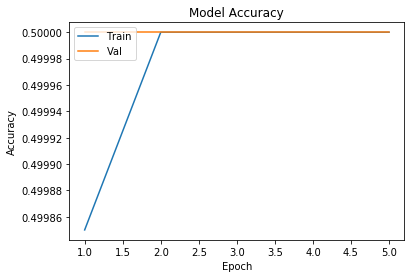

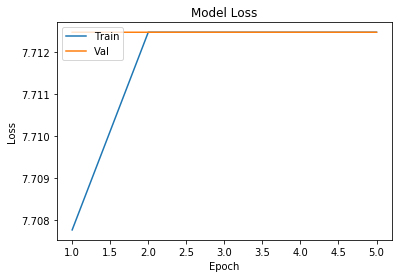

In [0]:
plot_learning_curve(history, 5)

### Implement first 3 blocks of VGG16

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=128, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=256, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
 551/1000 [===============>..............] - ETA: 2:05 - loss: 7.6886 - accuracy: 0.4950

KeyboardInterrupt: ignored

### Batch Normalization and Drop out

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/10
1000/1000 [==============================] - 381s 381ms/step - loss: 0.7061 - accuracy: 0.5786 - val_loss: 0.6319 - val_accuracy: 0.6686
Epoch 2/10
1000/1000 [==============================] - 383s 383ms/step - loss: 0.6517 - accuracy: 0.6605 - val_loss: 0.6416 - val_accuracy: 0.6460
Epoch 3/10
1000/1000 [==============================] - 383s 383ms/step - loss: 0.6112 - accuracy: 0.6766 - val_loss: 0.5643 - val_accuracy: 0.6930
Epoch 4/10
1000/1000 [==============================] - 381s 381ms/step - loss: 0.5656 - accuracy: 0.7149 - val_loss: 0.6263 - val_accuracy: 0.6656
Epoch 5/10
1000/1000 [==============================] - 380s 380ms/step - loss: 0.5241 - accuracy: 0.7431 - val_loss: 0.5426 - val_accuracy: 0.7300
Epoch 6/10
1000/1000 [==============================] - 379s 379ms/step - loss: 0.4815 - accuracy: 0.7749 - val_loss: 0.5231 - val_accuracy: 0.7448
Epoch 7/10
1000/1000 [==============================] - 379s 379ms/step - loss: 0.4550 - accuracy: 0.7969 - val_

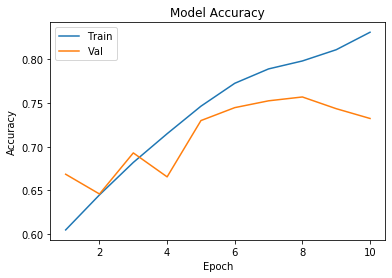

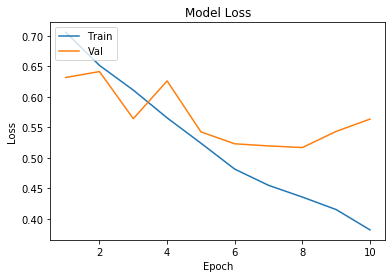

In [0]:
plot_learning_curve(history, 10)